## Projeto de Redes Sociais

In [19]:
import freeman as fm
import seaborn as sns
import statsmodels.api as sm
import networkx as nx
import pylab
from collections import defaultdict

In [20]:
g = fm.load('data/schools.gml')

In [21]:
g.set_all_nodes(size=10, labpos='hover')

# Deixar as arestas semi-transparentes para
# a visualização ficar um pouco mais leve.
# g.set_all_edges(color=(0, 0, 0, 0.25))

# Usar um algoritmo especial para posicionar
# os nós de acordo com grupos.
g.move('kamada_kawai')

g.draw()

In [22]:
schools = defaultdict(list)


# for n in g.nodes:
#     schools['id'].append(n)

for n in g.nodes:
    schools['isatm'].append(float(g.nodes[n]['isatm']))

for n in g.nodes:
    schools['closeness'].append(nx.closeness_centrality(g, n))

<ipython-input-23-c8f0e9e80f50>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



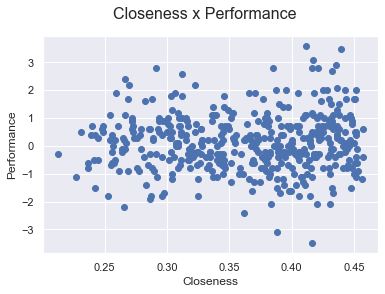

In [23]:
ax = pylab.subplot(111)
ax.scatter(schools['closeness'], schools['isatm'])
pylab.xlabel('Closeness')
pylab.ylabel('Performance')
pylab.suptitle('Closeness x Performance', fontsize=16)
ax.figure.show()

In [24]:
model = sm.OLS(schools['isatm'], schools['closeness'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              6.999
Date:                Sat, 07 Nov 2020   Prob (F-statistic):                     0.00844
Time:                        11:39:42   Log-Likelihood:                         -640.37
No. Observations:                 447   AIC:                                      1283.
Df Residuals:                     446   BIC:                                      1287.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3451      0.130      2.646      0.008       0.089       0.601
==============================================================================
Omnibus:                       11.161   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.139
Skew:                           0.224   Prob(JB):                     0.000516
Kurtosis:                       3.782   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""